# Optical Composite Augmentation Demonstration
This work calls on the astroaugmentations package and the classes therein.

In [1]:
import astroaugmentations as AA
from astroaugmentations.datasets.galaxy_mnist import GalaxyMNIST

import albumentations as A
from albumentations.pytorch import ToTensorV2

import matplotlib.pyplot as plt
import numpy as np

# Composing a Custom Transformation

In [2]:
train_no_augmentation = GalaxyMNIST(root="./data", train=True, download=True)

custom_transform = A.Compose([
    A.ToFloat(),
    A.Lambda(
        name='Adding Simulated Sources',
        image=AA.optical.SuperimposeSources(
            mode='sersic'
        ), p=1)
])

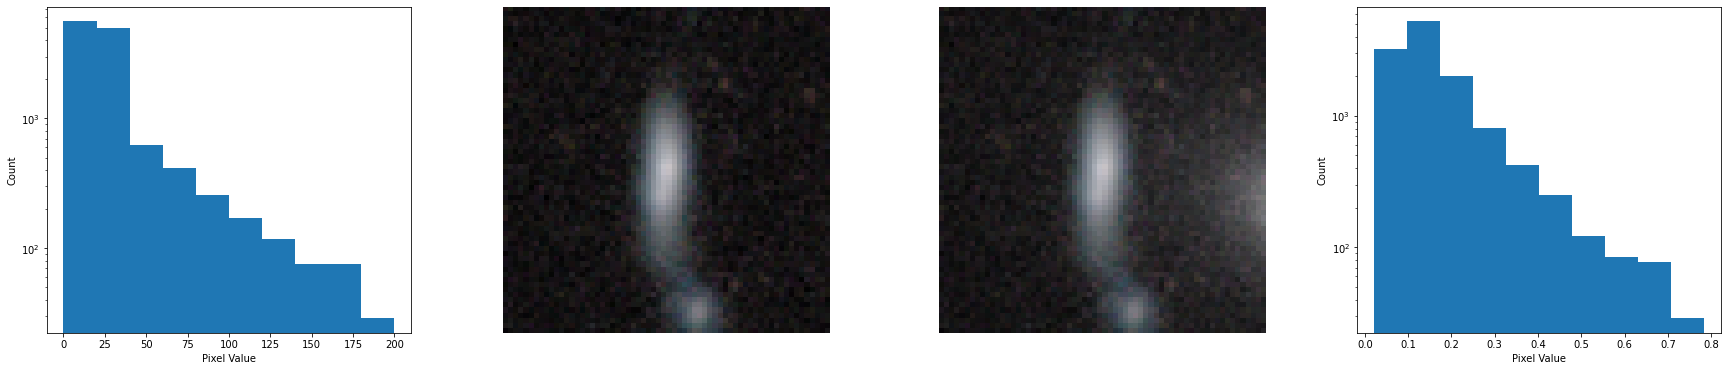

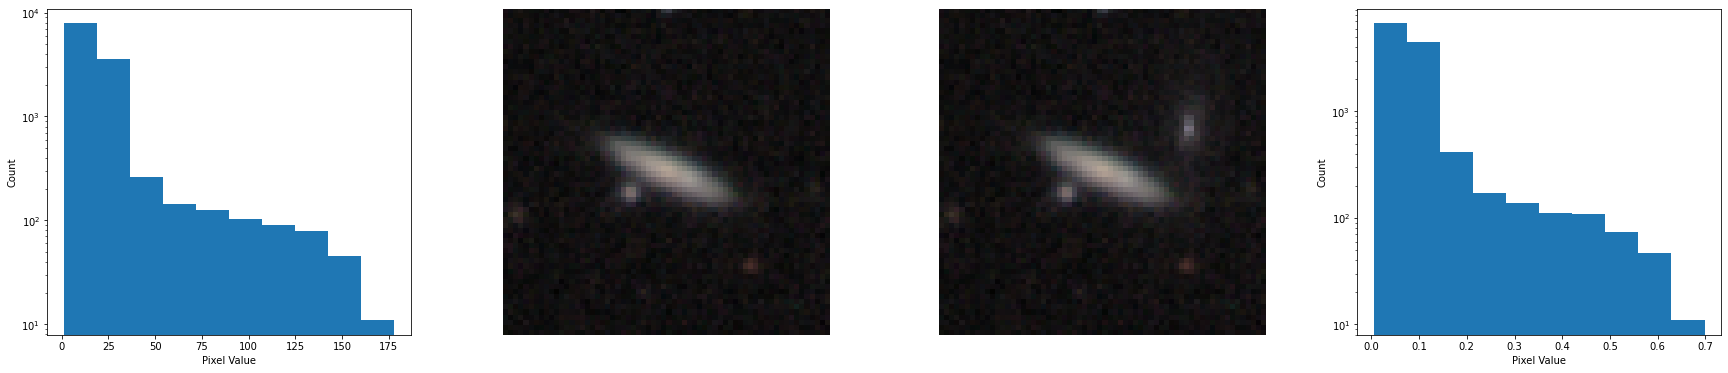

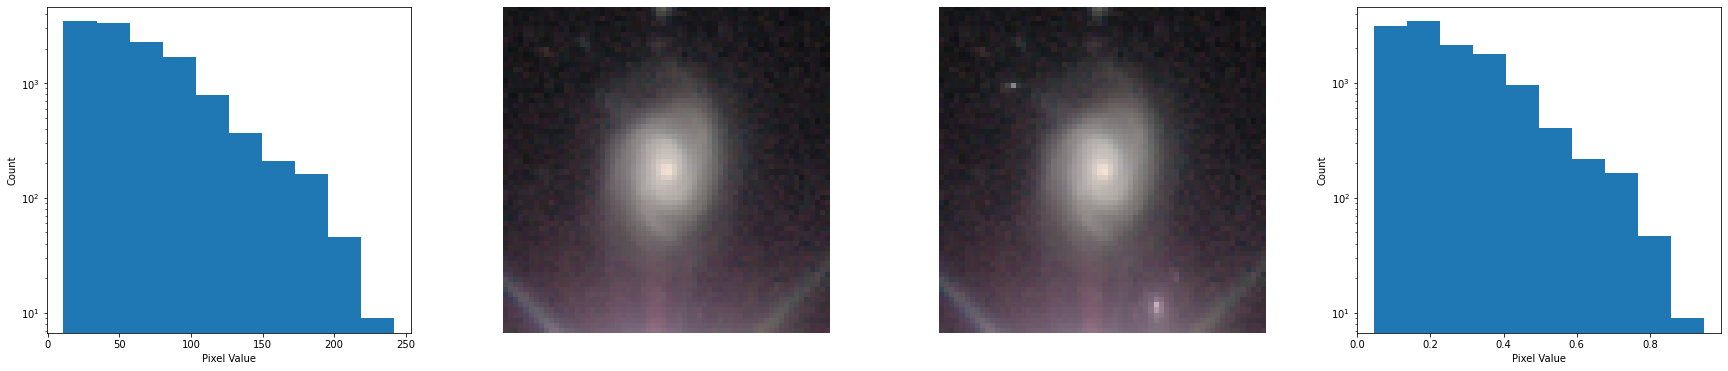

In [3]:
# Plot original image and transoformed image
number_of_examples = 3
transform_no = 1 
for idx, (image, target) in enumerate(train_no_augmentation):
    fig, ax = plt.subplots(1,transform_no+3, figsize=((transform_no+3)*7.5,6))
    image = np.asarray(image)
    ax[0].hist(image.squeeze().flatten())
    ax[0].set_yscale('log')
    ax[0].set_xlabel("Pixel Value")
    ax[0].set_ylabel("Count")
    
    ax[1].imshow(image.squeeze(), cmap="Greys_r")
    ax[1].axis('off')
    
    for i in range(transform_no):
        image = custom_transform(image=image)['image']
        ax[i+2].imshow(image, cmap="Greys_r")
        ax[i+2].axis('off')
    ax[transform_no+2].hist(image.squeeze().flatten())
    ax[transform_no+2].set_yscale('log')
    ax[transform_no+2].set_xlabel("Pixel Value")
    ax[transform_no+2].set_ylabel("Count")
    
    plt.show()
    if idx>=number_of_examples-1:
        break

# Using the Pre-Defined Augmentation Class (Optical)

In [4]:
train_no_augmentation = GalaxyMNIST(root="./data", train=True, download=True)
transform = A.Compose([
    A.Lambda(
        name='AA.composed.ImgOptical',
        image=AA.composed.ImgOptical(
            dataset=train_no_augmentation
        ),
        always_apply=True
    )
])
train = GalaxyMNIST(root="./data", train=True, download=True, transform=transform)
for img, target in train:
    print(img.shape)
    break

(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.029869856 0.82228744


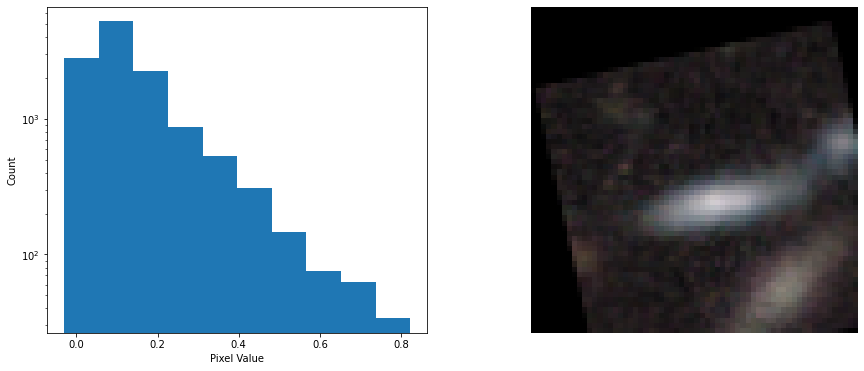

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.038121328 0.86136025


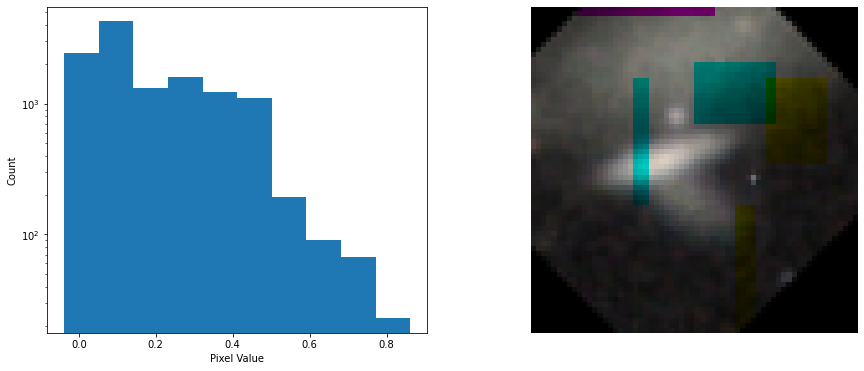

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.028922289344044512 0.483416484649554


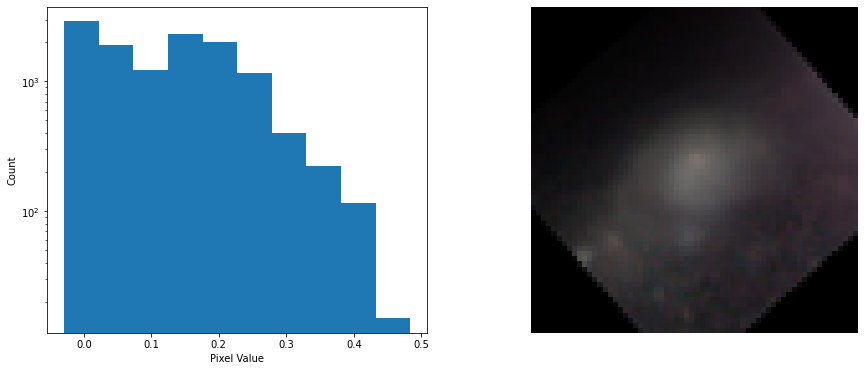

In [5]:
number_of_examples=3
for idx, (image, target) in enumerate(train):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    
    image = np.asarray(image)
    print(image.min(), image.max())
    ax[0].hist(image.squeeze().flatten())
    ax[0].set_yscale('log')
    ax[0].set_xlabel("Pixel Value")
    ax[0].set_ylabel("Count")

    ax[1].imshow(image.squeeze(), cmap="Greys_r")
    ax[1].axis('off')

    plt.show()
    if idx>=number_of_examples-1:
        break